# Singular Value Decomposition

## Understanding SVD

- SVD is a matrix factorization method.
- basically it rotates, streches and rotates the data for various methods.(we'll see it later)

$X = U \Sigma V^T$

### Full SVD

$X_{m \times n} = U_{m \times m} \Sigma_{m \times n} V^T_{n \times n}$

$\begin{bmatrix} 
    | && | && && | \\
    x_1 && x_2 && ... && x_n\\
    | && | && && | \\
\end{bmatrix}_{m \times n}\\=
\begin{bmatrix} 
    | && | && && | \\
    u_1 && u_2 && .. && u_m\\
    | && | && && | \\
\end{bmatrix}_{m \times m}
\begin{bmatrix} 
    \sigma_1 && 0 && 0 && 0 \\
    0 && \sigma_2 && 0 && 0 \\
    && ... \\
    0 && 0 && ... && \sigma_n \\
    0 && 0 && ... && 0\\
    0 && 0 && ... && 0\\
\end{bmatrix}_{m \times n}
\begin{bmatrix} 
    -- && v_1^T && -- \\
    -- && v_2^T && -- \\
       && ... \\
    -- && v_n^T && -- \\
\end{bmatrix}_{n \times n}$

### Economy SVD


$X_{m \times n} = U_{m \times n} \Sigma_{n \times n} V^T_{n \times n}$

$\begin{bmatrix} 
    | && | && && | \\
    x_1 && x_2 && ... && x_n\\
    | && | && && | \\
\end{bmatrix}_{m \times n}\\=
\begin{bmatrix} 
    | && | && && | \\
    u_1 && u_2 && .. && u_n\\
    | && | && && | \\
\end{bmatrix}_{m \times n}
\begin{bmatrix} 
    \sigma_1 && 0 && 0 && 0 \\
    0 && \sigma_2 && 0 && 0 \\
    && ... \\
    0 && 0 && ... && \sigma_n
\end{bmatrix}_{n \times n}
\begin{bmatrix} 
    -- && v_1^T && -- \\
    -- && v_2^T && -- \\
       && ... \\
    -- && v_n^T && -- \\
\end{bmatrix}_{n \times n}$


$X = \sigma_1 u_1 v_1^T + \sigma_1 u_1 v_1^T + ... + \sigma_n u_n v_n^T + 0 = \hat{U} \hat{\Sigma} \hat{V}^T$
[Till m ranks]
[So actually here you just need to take m columns from U matrix because rest of them will automatically be multiplied with 0 from $\Sigma$. It is called an economy SVD]



### Properties

- $U^T U = U U^T = I_{m \times m}$
- $V^T V = V V^T = I_{n \times n}$
(i.e. U and V are `orthogonal`, unitary matrices)
- $\Sigma$ is heirarchically ordered ranks $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_n \geq 0$ . Ordered by importance.
- the columns of U are the Left singular vectors.
- $\Sigma$ (the same dimensions as A) has singular values and is `diagonal`.
- and $V^T$ has rows that are the Right singular vectors. The SVD represents an expansion of the original data in a coordinate system where the covariance matrix is diagonal.

```
_____________________    __________ ______________________
|                   |    |        ||                     |
|                   |    |        ||          V^T        |
|                   |    |        ||_____________________|
|                   |    |        | \
|         X         |  = |   U    |  \
|                   |    |        |   \ Sigma
|                   |    |        |    \
|                   |    |        |     \
|___________________|    |________|      \
```

### Explore with numpy

In [1]:
import numpy as np

In [2]:
x = np.array([
    [1, 2, 6, 8],
    [3, 4, 7, 9],
    [10, 11, 12, 13],
    [14, 15, 16, 17],
    [18, 19, 20, 21]
])

#### Full SVD

In [3]:
u, s, vT = np.linalg.svd(x,full_matrices=True)

In [4]:
x, x.shape

(array([[ 1,  2,  6,  8],
        [ 3,  4,  7,  9],
        [10, 11, 12, 13],
        [14, 15, 16, 17],
        [18, 19, 20, 21]]),
 (5, 4))

In [5]:
m,n = x.shape

In [6]:
u, u.shape # m x m

(array([[-1.58141816e-01, -7.70036344e-01,  4.98241737e-01,
          3.65773654e-01, -5.42474680e-16],
        [-2.08984500e-01, -5.73839110e-01, -5.06126108e-01,
         -6.08991394e-01,  9.00305729e-16],
        [-4.05604099e-01,  5.92809235e-03, -5.58280362e-01,
          5.97583921e-01,  4.08248290e-01],
        [-5.45360165e-01,  1.27039223e-01, -6.73767867e-02,
          1.23438357e-01, -8.16496581e-01],
        [-6.85116231e-01,  2.48150354e-01,  4.23526789e-01,
         -3.50707206e-01,  4.08248290e-01]]),
 (5, 5))

In [7]:
s, s.shape # n x 1

(array([56.97171686,  6.33713594,  0.22186625,  0.12231847]), (4,))

In [8]:
np.diag(s), np.diag(s).shape # n x n , rest of the rows till m are 0

(array([[56.97171686,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  6.33713594,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.22186625,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.12231847]]),
 (4, 4))

In [9]:
vT, vT.shape # n x n

(array([[-0.43544889, -0.47061031, -0.52143556, -0.56304099],
        [ 0.60168865,  0.44976548, -0.2477965 , -0.6117832 ],
        [ 0.34825926, -0.59832332,  0.62970599, -0.35241319],
        [-0.5719008 ,  0.46716822,  0.51978094, -0.42954755]]),
 (4, 4))

##### Assemble

only select m columns from u. reason is explained above.

In [10]:
u[:,:n] @ np.diag(s) @ vT 

array([[ 1.,  2.,  6.,  8.],
       [ 3.,  4.,  7.,  9.],
       [10., 11., 12., 13.],
       [14., 15., 16., 17.],
       [18., 19., 20., 21.]])

#### Economy SVD

In [11]:
u, s, vT = np.linalg.svd(x,full_matrices=False)

In [12]:
x, x.shape

(array([[ 1,  2,  6,  8],
        [ 3,  4,  7,  9],
        [10, 11, 12, 13],
        [14, 15, 16, 17],
        [18, 19, 20, 21]]),
 (5, 4))

In [13]:
m,n = x.shape

In [14]:
u, u.shape # m x n , rest are not required as per economy conditions

(array([[-0.15814182, -0.77003634,  0.49824174,  0.36577365],
        [-0.2089845 , -0.57383911, -0.50612611, -0.60899139],
        [-0.4056041 ,  0.00592809, -0.55828036,  0.59758392],
        [-0.54536017,  0.12703922, -0.06737679,  0.12343836],
        [-0.68511623,  0.24815035,  0.42352679, -0.35070721]]),
 (5, 4))

In [15]:
s, s.shape # n x 1

(array([56.97171686,  6.33713594,  0.22186625,  0.12231847]), (4,))

In [16]:
np.diag(s), np.diag(s).shape # n x n 

(array([[56.97171686,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  6.33713594,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.22186625,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.12231847]]),
 (4, 4))

In [17]:
vT, vT.shape # n x n

(array([[-0.43544889, -0.47061031, -0.52143556, -0.56304099],
        [ 0.60168865,  0.44976548, -0.2477965 , -0.6117832 ],
        [ 0.34825926, -0.59832332,  0.62970599, -0.35241319],
        [-0.5719008 ,  0.46716822,  0.51978094, -0.42954755]]),
 (4, 4))

##### Assemble

In [18]:
u @ np.diag(s) @ vT

array([[ 1.,  2.,  6.,  8.],
       [ 3.,  4.,  7.,  9.],
       [10., 11., 12., 13.],
       [14., 15., 16., 17.],
       [18., 19., 20., 21.]])

## U & V orthogonality (Unitary matrices)

In linear algebra, a complex square matrix U is unitary if its complexconjugate transpose U* is also its inverse, that is, if 

- U* U = U U* = I
- $U^T U = U U^T = I_{m \times m}$
- preserves angles and lengths of vectors


References -
https://en.wikipedia.org/wiki/Unitary_matrix

In [19]:
u, s, vT = np.linalg.svd(np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]),full_matrices=True)

In [20]:
u.T @ u

array([[ 1.00000000e+00, -4.16752645e-16, -2.35964624e-16],
       [-4.16752645e-16,  1.00000000e+00,  1.54744399e-17],
       [-2.35964624e-16,  1.54744399e-17,  1.00000000e+00]])

here matrix diagonal is 1. and all the other values are very close to 0.

In [21]:
u @ u.T

array([[1.00000000e+00, 3.47261704e-16, 4.11525596e-16],
       [3.47261704e-16, 1.00000000e+00, 1.27275187e-16],
       [4.11525596e-16, 1.27275187e-16, 1.00000000e+00]])

In [22]:
vT.T @ vT

array([[ 1.00000000e+00,  2.99890479e-17, -7.61192045e-18],
       [ 2.99890479e-17,  1.00000000e+00,  2.08316059e-17],
       [-7.61192045e-18,  2.08316059e-17,  1.00000000e+00]])

In [23]:
vT @ vT.T

array([[ 1.00000000e+00, -6.26998392e-17,  7.69567375e-18],
       [-6.26998392e-17,  1.00000000e+00, -2.69802028e-17],
       [ 7.69567375e-18, -2.69802028e-17,  1.00000000e+00]])

## Eckart-Young Theorem (Low rank approximation)

Best approximation of X = $\tilde{X}$ (X tilde)


${{argmin}\atop{{\tilde{X} such.that. rank(\tilde{X}) = r}}} {|| X - \tilde{X} ||}_F = \tilde{U}\tilde{\Sigma}\tilde{V}^T$

F = The Frobenius norm, sometimes also called the Euclidean norm (a term unfortunately also used for the vector -norm), is matrix norm of an matrix defined as the square root of the sum of the absolute squares of its elements.

rank r means selecting only 
- r columns of u
- r rows of $v^T$
- and $\sigma$ only till r 

$\tilde{U}^T\tilde{U} = I_{r \times r}$ it is still an (r x r) identity matrix

$\tilde{U}^T\tilde{U} \ne I_{m \times m}$ but not (m x m)

Below we are calculating approximations with rank r and Frobenius norm(Euclidean distances of the vectors, or as I understood rmse)

In [24]:
x

array([[ 1,  2,  6,  8],
       [ 3,  4,  7,  9],
       [10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

In [25]:
u, s, vT = np.linalg.svd(x,full_matrices=False)

In [26]:
r = 1

x_tilde = u[:,:r] @ np.diag(s)[:r,:r] @ vT[:r]

x_tilde , np.sqrt(np.square(x - x_tilde).sum())

(array([[ 3.923225  ,  4.24001577,  4.69793141,  5.0727802 ],
        [ 5.18454406,  5.60318323,  6.20831901,  6.70368189],
        [10.06233633, 10.87484522, 12.04931296, 13.0107298 ],
        [13.52944265, 14.62191184, 16.20105742, 17.49374269],
        [16.99654897, 18.36897847, 20.35280189, 21.97675558]]),
 6.342198225330375)

In [27]:
r = 2

x_tilde = u[:,:r] @ np.diag(s)[:r,:r] @ vT[:r]

x_tilde , np.sqrt(np.square(x - x_tilde).sum())

(array([[ 0.98708971,  2.04523896,  5.90713494,  8.05817515],
        [ 2.99650543,  3.96761267,  7.10943008,  8.92842933],
        [10.08494004, 10.89174162, 12.04000396, 12.98774686],
        [14.01384101, 14.98400221, 16.00156518, 17.00121755],
        [17.94274198, 19.0762628 , 19.9631264 , 21.01468825]]),
 0.253350433705557)

In [28]:
r = 3

x_tilde = u[:,:r] @ np.diag(s)[:r,:r] @ vT[:r]

x_tilde , np.sqrt(np.square(x - x_tilde).sum())

(array([[ 1.02558734,  1.97909849,  5.97674455,  8.01921833],
        [ 2.9573986 ,  4.03479978,  7.03871895,  8.96800262],
        [10.0418034 , 10.96585208, 11.96200633, 13.03139801],
        [14.00863501, 14.99294632, 15.99215194, 17.00648565],
        [17.97546662, 19.02004057, 20.02229755, 20.98157328]]),
 0.12231846893897867)

In [29]:
r = 4

x_tilde = u[:,:r] @ np.diag(s)[:r,:r] @ vT[:r]

x_tilde , np.sqrt(np.square(x - x_tilde).sum())

(array([[ 1.,  2.,  6.,  8.],
        [ 3.,  4.,  7.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.],
        [18., 19., 20., 21.]]),
 2.3593480078153382e-14)

## SVD and Correlations

`This is an interpretation of SVD. Not a very good computation method`

$X^TX=\begin{bmatrix}
    -- && x_1^T && --\\
    -- && x_2^T && --\\
    && .\\
    && .\\
    -- && x_n^T && --\\
\end{bmatrix}_{n \times m}
\begin{bmatrix}
    | && | &&  && |\\
    x_1 && x_2 && ... && x_n\\
    | && | &&  && |\\
\end{bmatrix}_{m \times n}=
\begin{bmatrix}
    x_1^T x_1 && x_1^T x_2 && ... && x_1^T x_n\\
    x_2^T x_1 && x_2^T x_2 && ... && x_2^T x_n\\
    . && . && ... && .\\
    x_n^T x_1 && x_n^T x_2 && ... && x_n^T x_n\\
\end{bmatrix}_{n \times n}$

> here we are calculating product of columns actually. observe the first row of the left matrix is actually the column of the original matrix and by matrix multiplication it is getting multiplied to the first column of the right matrix

if 
$X = U \Sigma V^T$

then 
$X^T = V \Sigma U^T$

$X^T X = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T$

multiplying V both sides

$X^T X V = V \Sigma^2$

$XX^T=\begin{bmatrix}
    | && | &&  && |\\
    x_1 && x_2 && ... && x_n\\
    | && | &&  && |\\
\end{bmatrix}_{m \times n}
\begin{bmatrix}
    -- && x_1^T && --\\
    -- && x_2^T && --\\
    && .\\
    && .\\
    -- && x_n^T && --\\
\end{bmatrix}_{n \times m}=
\begin{bmatrix}
    x_1x_1^T  && x_2 x_1^T  && ... && x_1^T x_m\\
    x_2^T x_1 && x_2 x_2^T  && ... && x_2^T x_m\\
    . && . && ... && .\\
    x_m^T x_1 && x_2 x_m^T && ... && x_m^T x_m\\
\end{bmatrix}_{m \times m}$

> here we are calculating product of rows

$X X^T = U \Sigma V^T V \Sigma U^T  = U \Sigma^2 U^T$

multiplying U both sides
$X^T X U = U \Sigma^2$

$\Sigma^2$ = Eigen Values\
U,V = Eigen Vectors

Now using this explanation to calculate SVD

## Method of Snapshots (SVD using eigen values and vectors)

- for U
    - calculate X * $X^T$
    - calculate eigen values and vectors
    - U = eigen vectors of X * $X^T$

- for V
    - calculate $X^T$ * X
    - calculate eigen values and vectors
    - V = eigen vectors of $X^T$ * X

In [30]:
x_xT = x @ x.T
U_values, U = np.linalg.eig(x_xT)

- eigen vector for U

In [31]:
print(U)

[[ 1.58141816e-01 -7.70036344e-01  4.98241737e-01  3.65773654e-01
   1.66017468e-13]
 [ 2.08984500e-01 -5.73839110e-01 -5.06126108e-01 -6.08991394e-01
  -2.51244615e-13]
 [ 4.05604099e-01  5.92809235e-03 -5.58280362e-01  5.97583921e-01
   4.08248290e-01]
 [ 5.45360165e-01  1.27039223e-01 -6.73767867e-02  1.23438357e-01
  -8.16496581e-01]
 [ 6.85116231e-01  2.48150354e-01  4.23526789e-01 -3.50707206e-01
   4.08248290e-01]]


- eigen value of U

In [32]:
print(U_values)

[3.24577652e+03 4.01592919e+01 4.92246344e-02 1.49618078e-02
 5.41176252e-16]


In [33]:
xT_x = x.T @ x

V_values, V = np.linalg.eig(xT_x)

- eigen vector of V

In [34]:
print(V.T)

[[ 0.43544889  0.47061031  0.52143556  0.56304099]
 [-0.60168865 -0.44976548  0.2477965   0.6117832 ]
 [ 0.5719008  -0.46716822 -0.51978094  0.42954755]
 [-0.34825926  0.59832332 -0.62970599  0.35241319]]


- eigen value of V

In [35]:
print(V_values)

[3.24577652e+03 4.01592919e+01 1.49618078e-02 4.92246344e-02]


- singular value : square root of U values in descending order

In [36]:
singular_val = np.sqrt(U_values.real[:-1])
np.sort(singular_val)[::-1]

array([56.97171686,  6.33713594,  0.22186625,  0.12231847])

## Vector outer product

$a=\begin{bmatrix}
    a_0 && a_1 && ... && a_m
\end{bmatrix}$

$b=\begin{bmatrix}
    b_0 && b_1 && ... && b_n
\end{bmatrix}$

Vector outer product = $\begin{bmatrix}
    a_0b_0 && a_0b_1 && ... && a_0b_n\\
    a_1b_0 && a_1b_1 && ... && a_1b_n\\
    && ... && ... &&\\
    a_mb_0 && a_mb_1 && ... && a_mb_n\\    
\end{bmatrix}$

Example - 
$\begin{bmatrix}
    3 && 4\\
\end{bmatrix}
\begin{bmatrix}
    5 && 6\\
\end{bmatrix}=
\begin{bmatrix}
    3 \\
    4
\end{bmatrix}
\begin{bmatrix}
    5 && 6
\end{bmatrix}=
\begin{bmatrix}
    3 \times 5 && 3 \times 6 \\
    4 \times 5 && 4 \times 6
\end{bmatrix}=
\begin{bmatrix}
    15 && 18 \\
    20 && 24
\end{bmatrix}$

In [37]:
np.outer(np.array([3,4]),np.array([5,6]))

array([[15, 18],
       [20, 24]])

## SVD and Image Compression

In simple words choosing lowest rank index(ranks are in descending order) required to generate a close approximation original matrix.

In [38]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "axes.grid": True
})

%matplotlib inline

In [39]:
img = plt.imread('./images/rdj.jpg') / 255

In [40]:
gray_img = np.mean(img,axis=2) #2 because I know this is a 3D matrix. I can give -1 to take the maximum dimension

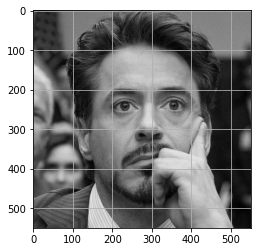

In [41]:
plt.imshow(gray_img,cmap='gray')

In [42]:
gray_img.shape

(550, 550)

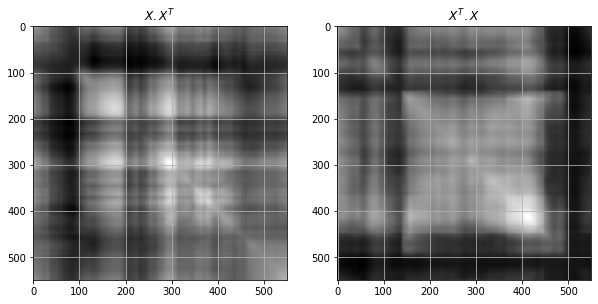

In [43]:
%matplotlib inline

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,2)

ax[0].set_title(f"$X . X^T$")
ax[0].imshow(gray_img @ gray_img.T, cmap='gray')

ax[1].set_title(f"$X^T . X$")
ax[1].imshow(gray_img.T @ gray_img, cmap='gray')

In [44]:
u,s,vT = np.linalg.svd(gray_img,full_matrices=True)

ranks = [5,10,25,50,100,500]

## Log and Cumulative plots

- log plot will show to keep the first few ranks and throw rest of them as thier rank/ importance is not that much.
- cumulative plots purpose is to see that at what rank what percentage of the original matrix values(energy) is getting covered.\
    on x axis = ranks\
    on y axis = $\frac{\sum_{i=0}^{r}{\sigma_i}}{\sum_{i=0}^{m}{\sigma_i}}$    
- to pick up a rank where we can get maximum energy possible

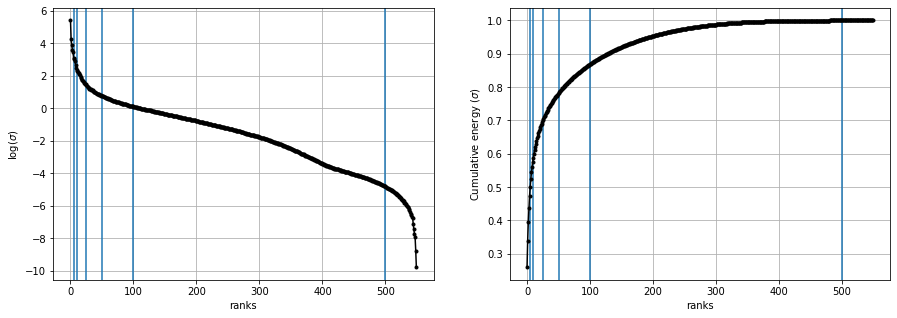

In [45]:
%matplotlib inline

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set(xlabel='ranks',ylabel='log($\sigma$)')
for rank in ranks:
    ax[0].axvline(rank)
ax[0].plot(np.log(s),'k.-')

ax[1].set(xlabel='ranks',ylabel='Cumulative energy ($\sigma$)')
for rank in ranks:
    ax[1].axvline(rank)
ax[1].plot(np.cumsum(s)/np.sum(s),'k.-')

we can see around at rank 100, approx 90% original matrix is recovered.

In [46]:
def calc_c_mat(u,s,vT,r):
    """Compressed matrix calculation.
    """
    return u[:,:r] @ np.diag(s)[:r,:r] @ vT[:r]

def calc_cum_enery_percentage(s,r):
    return np.sum(s[:r])/np.sum(s)

def rmse(x,x_bar):
    return np.sqrt(np.square(x - x_bar).sum())

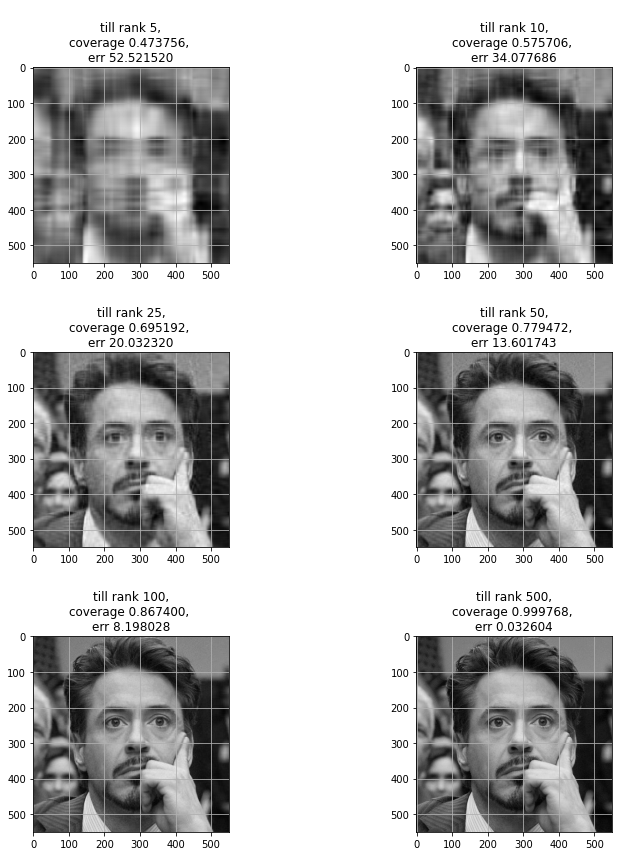

In [47]:
%matplotlib inline

fig,ax = plt.subplots(3,2,figsize=(12,12))

r = ranks[0]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[0][0].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[0][0].imshow(c_img,cmap='gray')

r = ranks[1]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[0][1].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[0][1].imshow(c_img,cmap='gray')

r = ranks[2]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[1][0].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[1][0].imshow(c_img,cmap='gray')


r = ranks[3]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[1][1].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[1,1].imshow(c_img,cmap='gray')

r = ranks[4]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[2][0].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[2][0].imshow(c_img,cmap='gray')

r = ranks[5]
c_img = calc_c_mat(u,s,vT,r)
err = rmse(gray_img,c_img)
cov = calc_cum_enery_percentage(s,r)
ax[2][1].set_title(f"""
till rank {r},
coverage {cov:2f}, 
err {err:2f}""")
ax[2][1].imshow(c_img,cmap='gray')

plt.tight_layout()

## Rotation matrix

In linear algebra, a rotation matrix is a transformation matrix that is used to perform a rotation in Euclidean space. For example, using the convention below, the matrix for 

2D Rotation 

$R(\theta) = \begin{bmatrix}
    cos\theta && -sin\theta\\
    sin\theta && cos\theta
\end{bmatrix}$


3D Rotation

$R_x(\theta) = \begin{bmatrix}
    1 && 0 && 0\\
    0 && cos\theta && -sin\theta\\
    0 && sin\theta && cos\theta
\end{bmatrix}$

$R_y(\theta) = \begin{bmatrix}
    cos\theta && 0 && sin\theta\\
    0 && 1 && 0\\
    -sin\theta && 0 && cos\theta
\end{bmatrix}$

$R_z(\theta) = \begin{bmatrix}
    cos\theta && -sin\theta && 0\\
    sin\theta && cos\theta && 0\\
    0 && 0 && 1\\
\end{bmatrix}$

$R(\theta) = R_x(\theta) R_y(\theta) R_z(\theta)$

References-
https://en.wikipedia.org/wiki/Rotation_matrix

### Rotating vectors $90^\circ$ or $\pi/2$

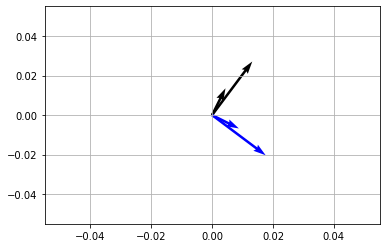

In [48]:
theta = np.pi/2

R = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

vec = np.array([
    [1, 2],
    [3, 4]
])


vecR = vec @ R #multiply rotation matrix with vector matrix

x,y = vec[...,[0]],vec[...,[1]]
Rx, Ry = vecR[...,[0]],vecR[...,[1]]
fig,ax = plt.subplots(1,1)

ax.quiver(*np.zeros_like(vec.T),x,y,scale=25)
ax.quiver(*np.zeros_like(vecR.T),Rx,Ry,scale=25,color='blue')

plt.show()

### Rotating vectors $180^\circ$ or $\pi$

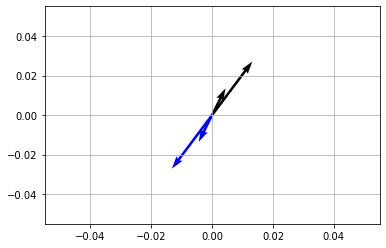

In [49]:
theta = np.pi

R = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

vec = np.array([
    [1, 2],
    [3, 4]
])


vecR = vec @ R

x,y = vec[...,[0]],vec[...,[1]]
Rx, Ry = vecR[...,[0]],vecR[...,[1]]
fig,ax = plt.subplots(1,1)

ax.quiver(*np.zeros_like(vec.T),x,y,scale=25)
ax.quiver(*np.zeros_like(vecR.T),Rx,Ry,scale=25,color='blue')

plt.show()


## Unitary transformation

- rotate vectors , dont change angles between them

$< x, y > = < Ux, Uy > \forall{x,y}\in\mathbf{R}$

        <,> = inner product
        Ux = unitary transformed x
        Uy = unitary transformed y

if X $\in \mathbf{C}$ complex then X* is complex conjugate transpose.


References -

https://en.wikipedia.org/wiki/Unitary_transformation

https://en.wikipedia.org/wiki/Singular_value_decomposition

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/800px-Singular-Value-Decomposition.svg.png" alt="unitary transformation diagram" height=550 width=550/>

In [62]:
from mpl_toolkits import mplot3d

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
# theta = [np.pi/15, -np.pi/9, -np.pi/20]

theta = [np.pi/4,np.pi/4,np.pi/4]


# rotation on x
Rx = np.array([
    [1, 0, 0],
    [0, np.cos(theta[0]), -np.sin(theta[0])],
    [0, np.sin(theta[0]), np.cos(theta[0])]
])

# rotation on y
Ry = np.array([
    [np.cos(theta[1]), 0, np.sin(theta[1])],
    [0, 1, 0],
    [-np.sin(theta[1]), 0, np.cos(theta[1])]
])

# rotation on z
Rz = np.array([
    [np.cos(theta[2]), -np.sin(theta[2]), 0],
    [np.sin(theta[2]), np.cos(theta[2]), 0],
    [0, 0, 1]
])

# stretch
Sigma = np.diag([5, 3, 1])

X = Rz @ Ry @ Rx @ Sigma

U, S, VT = np.linalg.svd(X,full_matrices=False)

### Multiplying by X

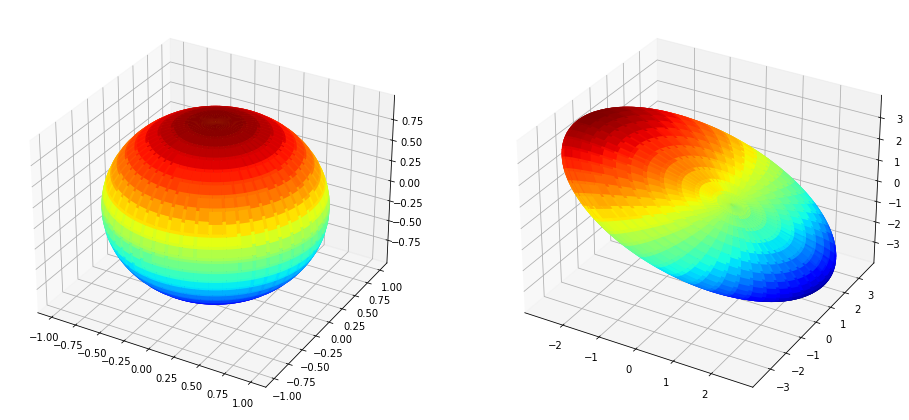

In [200]:
plt.rcParams["figure.figsize"] = (16, 8)

u = np.linspace(-np.pi,np.pi, 100)
v = np.linspace(-np.pi,np.pi, 100)

x = np.outer(np.cos(u),np.cos(v))
y = np.outer(np.sin(u),np.cos(v))
z = np.outer(np.ones_like(u),np.sin(v))

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')

ax1.plot_surface(x, y, z, cmap='jet')


xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

rows,columns = x.shape

for row in range(rows):
    for col in range(columns):
        vec = [ x[row,col], y[row,col], z[row,col] ]
        
        vecR = X @ vec
        xR[row, col] = vecR[0]
        yR[row, col] = vecR[1]        
        zR[row, col] = vecR[2]        

ax2 = fig.add_subplot(122,projection='3d')

ax2.plot_surface(xR, yR, zR, cmap='jet')

plt.show()

### Multiplying by $U\Sigma$

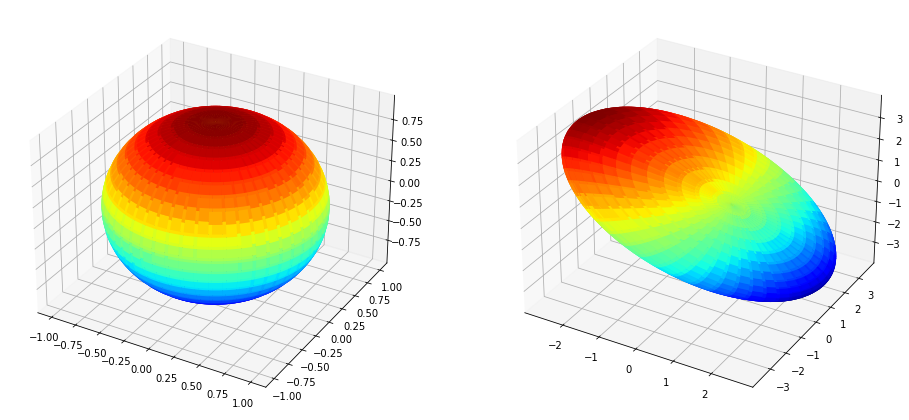

In [204]:
plt.rcParams["figure.figsize"] = (16, 8)

u = np.linspace(-np.pi,np.pi, 100)
v = np.linspace(-np.pi,np.pi, 100)

x = np.outer(np.cos(u),np.cos(v))
y = np.outer(np.sin(u),np.cos(v))
z = np.outer(np.ones_like(u),np.sin(v))

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')

ax1.plot_surface(x, y, z, cmap='jet')


xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

rows,columns = x.shape

for row in range(rows):
    for col in range(columns):
        vec = [ x[row,col], y[row,col], z[row,col] ]
        
        vecR = U @ np.diag(S) @ vec 
        xR[row, col] = vecR[0]
        yR[row, col] = vecR[1]        
        zR[row, col] = vecR[2]        

ax2 = fig.add_subplot(122,projection='3d')

ax2.plot_surface(xR, yR, zR, cmap='jet')

plt.show()